# Task 2

# Jupiter mass estimation with regression

Let's get the data and import module first:

In [1]:
from jupiter import Moons
filepath='jupiter.db'
moons=Moons(filepath)

First, we need to exctract columns corresponding to a^3 and T. To do that, we should look at column names first:

In [2]:
moons.get_features()

['period_days',
 'distance_km',
 'radius_km',
 'mag',
 'mass_kg',
 'group',
 'ecc',
 'inclination_deg']

Check for missing values:

In [3]:
moons.count_missing_values()

{'period_days': 0,
 'distance_km': 0,
 'radius_km': 0,
 'mag': 3,
 'mass_kg': 50,
 'group': 0,
 'ecc': 0,
 'inclination_deg': 0}


In our case we will use period_days for T and distance_km for 'a'.
Our features have no missing values.

Let's plot them against each other (will use 'a' as an argument):

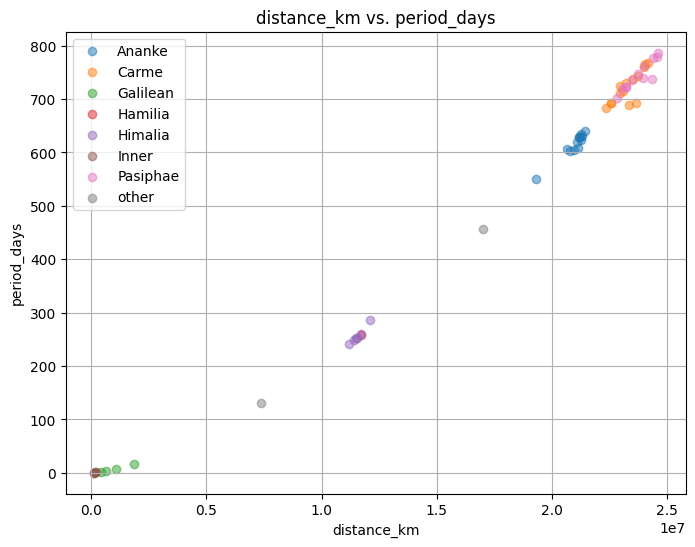

In [4]:
moons.plot_columns('distance_km', 'period_days',use_group=True)

Graph looks curved. Doesn't look like an exact straight line. Let's try to convert columns to needed units and raise them to powers as per formula: 

In [5]:
moons.data['period_seconds']=(moons.data['period_days']*86400)**2
moons.data['distance_m']=(moons.data['distance_km']*1000)**3

Now data looks a lot more linear:

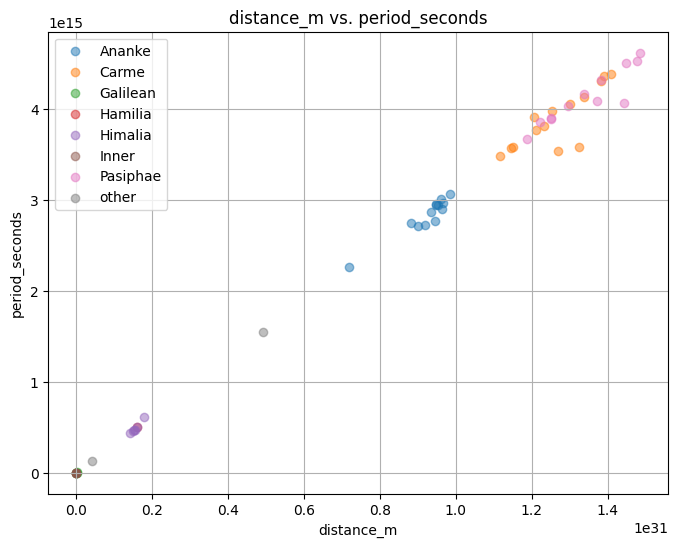

In [6]:
moons.plot_columns('distance_m', 'period_seconds',use_group=True)

Let's build a regression model and plot it:

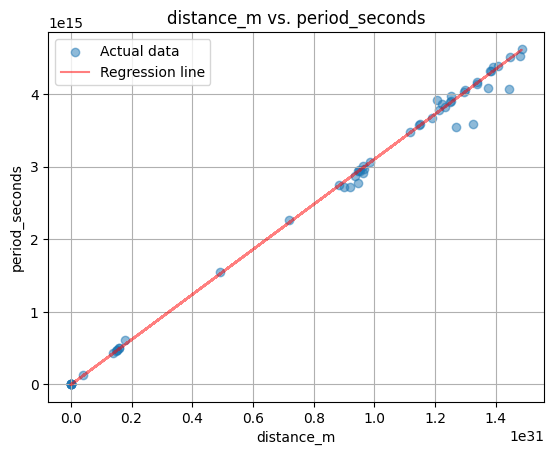

In [7]:
regression_model=moons.linreg_no_subs('distance_m', 'period_seconds', show=True)# apply a regression to distance and period columns, also plot it

Use metrics to estimate the efficiency:

In [8]:
print('The R2 score is:',regression_model[1][0])
print('The Mean square error in meters is:',regression_model[1][1])

The R2 score is: 0.9874698094589166
The Mean square error in meters is: 3.9427519223478217e+28


It is a good fit and quite a high R2 score. High Mean square error is a result of several outliers at high distance values.

 Let's look at our linear coefficient:

In [9]:
k=regression_model[0].coef_
print('The linear coefficient is:',k)

The linear coefficient is: [3.10779319e-16]


Let's use Kepler's law to estimate Jupiter's mass:

$$
\begin{align*}
\text{Know: }&\frac{T^2}{a^3}=k \\
& k=\frac{4\pi^2}{GM} \\
& \frac{1}{k} =\frac{GM}{4\pi^2} \\
& \frac{4\pi^2}{kG}= M
\end{align*}
$$

Let's use code to estimate M:

In [10]:
import numpy as np

G = 6.67e-11
M = 4*(np.pi*np.pi)/(k*G)

print('Jupiter mass estimate is:', M)

Jupiter mass estimate is: [1.90450357e+27]


The actual value is 1.899 * 10^27, while our estimate is 1.904 * 10^27:

In [11]:
print('The relative difference is: ',abs(1-1.904/1.899))

The relative difference is:  0.00263296471827279


It is less than half of percent. It is a good accuracy. Thus we report a value of:

In [12]:
print('Jupiter mass estimate is:', M[0], ' kg')

Jupiter mass estimate is: 1.9045035734306237e+27  kg


It looks like complex hyperparameter adjustment wasn't required due to high accuracy of current predictions.